In [1]:
from tools import *
from scraper import *
from data import *
from model import *
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
taps = tapsHandler()

Merging taps csvs...


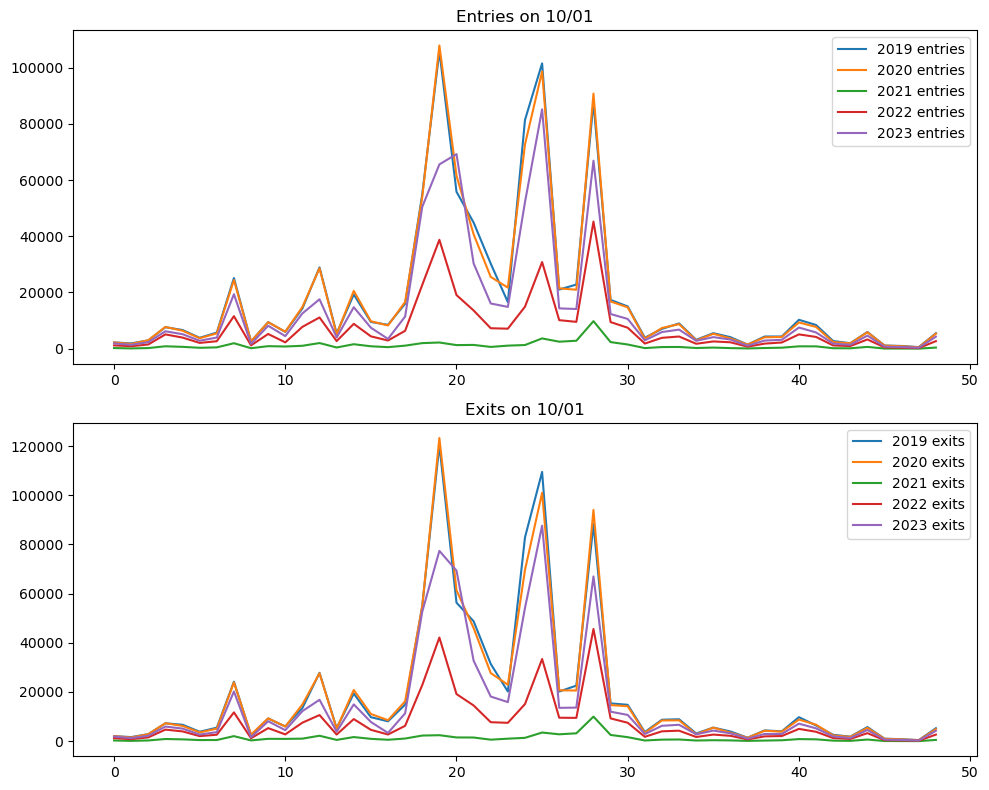

In [17]:
taps = tapsHandler()
llh = LinkLoadHandler()
all_stations = llh.get_all_stations()
years = [2019, 2020, 2021, 2022, 2023]
date = '10/01'
entries = []
exits = []
for i, year in enumerate(years):
    entries.append([])
    exits.append([])
    full_date = date + '/' + str(year)
    for station in all_stations:
        ret = taps.get_entries_exits(station, full_date)
        entries[i].append(ret["entries"])
        exits[i].append(ret["exits"])
ind_stations = [i for i in range(len(all_stations))]
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for entries
for i, year in enumerate(years):
    ax1.plot(ind_stations, entries[i], label=str(year) + ' entries')
ax1.set_title(f'Entries on {date}')
ax1.legend()

# Plot for exits
for i, year in enumerate(years):
    ax2.plot(ind_stations, exits[i], label=str(year) + ' exits')
ax2.set_title(f'Exits on {date}')
ax2.legend()

plt.tight_layout()
plt.show()
    

clearly year dependance (we can even observe the effect of COVID)
However, we would expect and overall increase in tube usage, but thats actually the opposite !
Also, it looks like the decrease coefficient is the same for the entries and exits (need to check for all stations). If its indeed the case, it means the distributions of the passengers doesn't evolve over time.

Change between several days -> the decrease isn't the same and along the same years 

In [37]:
"""For each day of the year, we compute the average number of entries and exits on all the line
    and plot it to see whether there is a trend or not (for certain days)
    !!!!!!!!!!!! IT TAKES A LOT OF TIME TO RUN !!!!!!!!!! like 6h....
"""
import datetime
days = get_dates_between('01/01/2019', '31/12/2019')
years = [2019, 2021, 2022, 2023]
entries = []
exits = []

for year in years:
    dates = get_dates_between('01/01/' + str(year), '31/12/' + str(year))
    entries.append([])
    exits.append([])
    i = 0
    for date in dates:
        avg_entries = 0
        avg_exits = 0
        for station in all_stations:
            ret = taps.get_entries_exits(station, date)
            avg_entries += ret["entries"]
            avg_exits += ret["exits"]
        avg_entries /= len(all_stations)
        avg_exits /= len(all_stations)
        entries[-1].append(avg_entries)
        exits[-1].append(avg_exits)
        if i % 10 == 0:
            print(f'{date} done')
        i += 1

plt.scatter(days, entries[0], label='2019')
plt.scatter(days, entries[1], label='2021')
plt.scatter(days, entries[2], label='2022')
plt.scatter(days, entries[3], label='2023')
plt.legend()
plt.title('Average entries per day')
plt.show()

01/01/2019 done
11/01/2019 done
21/01/2019 done
31/01/2019 done
10/02/2019 done
20/02/2019 done
02/03/2019 done
12/03/2019 done
22/03/2019 done
01/04/2019 done
11/04/2019 done
21/04/2019 done
01/05/2019 done
11/05/2019 done
21/05/2019 done
31/05/2019 done
10/06/2019 done
20/06/2019 done


KeyboardInterrupt: 

In [39]:
dates = get_dates_between('01/01/2020', '31/12/2020')
exits.append([])
entries.append([])
i = 0
for date in dates:
        avg_entries = 0
        avg_exits = 0
        for station in all_stations:
            ret = taps.get_entries_exits(station, date)
            avg_entries += ret["entries"]
            avg_exits += ret["exits"]
        avg_entries /= len(all_stations)
        avg_exits /= len(all_stations)
        entries[-1].append(avg_entries)
        exits[-1].append(avg_exits)
        if i % 10 == 0:
            print(f'{date} done')
        i += 1


01/01/2020 done
11/01/2020 done
21/01/2020 done
31/01/2020 done


KeyboardInterrupt: 

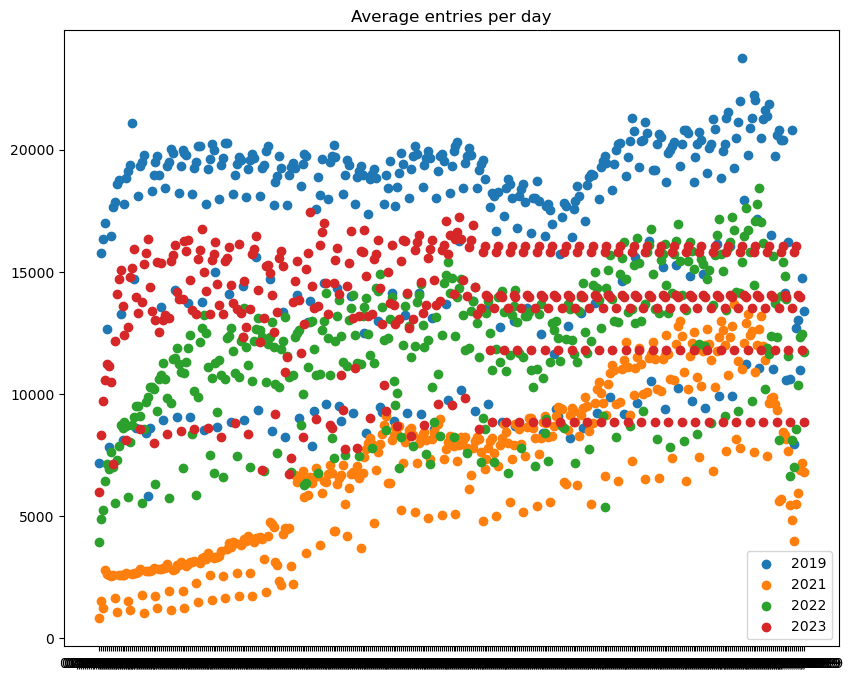

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(days, entries[0], label='2019')
plt.scatter(days, entries[1], label='2021')
plt.scatter(days, entries[2], label='2022')
plt.scatter(days, entries[3], label='2023')
plt.legend()
plt.title('Average entries per day')
plt.show()

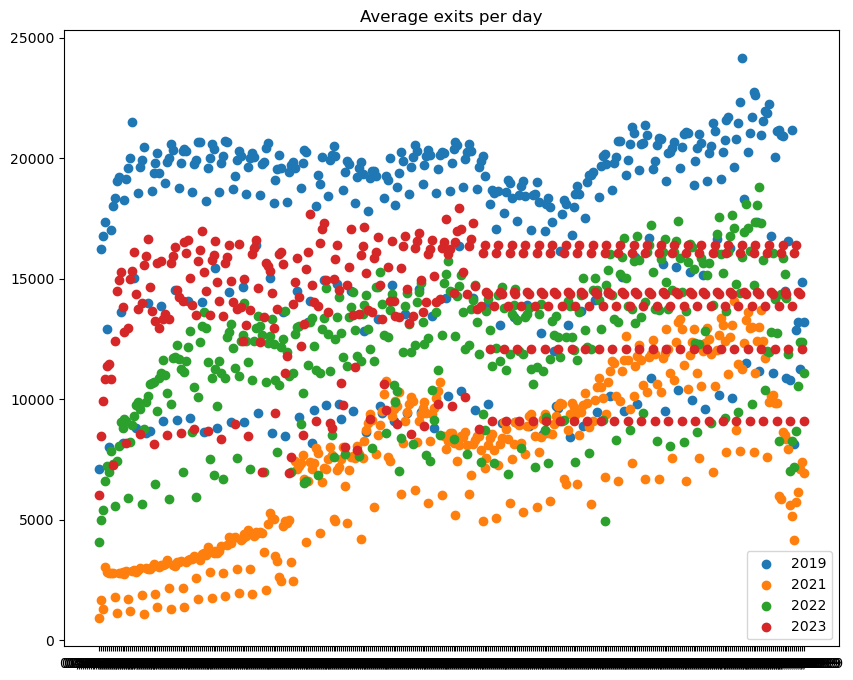

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(days, exits[0], label='2019')
plt.scatter(days, exits[1], label='2021')
plt.scatter(days, exits[2], label='2022')
plt.scatter(days, exits[3], label='2023')
plt.legend()
plt.title('Average exits per day')
plt.show()

We see a slight tendancy towards the end of the year, especially in 2021 (end of COVID ?), because for the other years it doesn't change much.
In 2023 -> periodic ?? -> don't have the data maybe -> verified, no data after 23/07/2023

In [4]:
dates = get_dates_between('01/06/2023', '31/12/2023')
taps = tapsHandler()
for date in dates:
    print(taps.get_entries_exits('Shepherds Bush', date))

{'entries': 22183, 'exits': 20478}
{'entries': 22773, 'exits': 19724}
{'entries': 25965, 'exits': 23340}
{'entries': 15745, 'exits': 15282}
{'entries': 18425, 'exits': 17233}
{'entries': 19870, 'exits': 18309}
{'entries': 20533, 'exits': 18786}
{'entries': 19964, 'exits': 18213}
{'entries': 19201, 'exits': 17762}
{'entries': 23788, 'exits': 21552}
{'entries': 15268, 'exits': 14201}
{'entries': 16947, 'exits': 16208}
{'entries': 19395, 'exits': 18158}
{'entries': 20515, 'exits': 19660}


KeyboardInterrupt: 

In [35]:
print(sum(entries[0]), sum(entries[1]), sum(entries[2]), sum(entries[3]))
print(sum(exits[0]), sum(exits[1]), sum(exits[2]), sum(exits[3]))

6129339.122448983 2551402.0612244913 4282854.775510203 4913766.204081636
6264215.306122449 2705858.408163266 4385234.224489794 5022066.6938775545


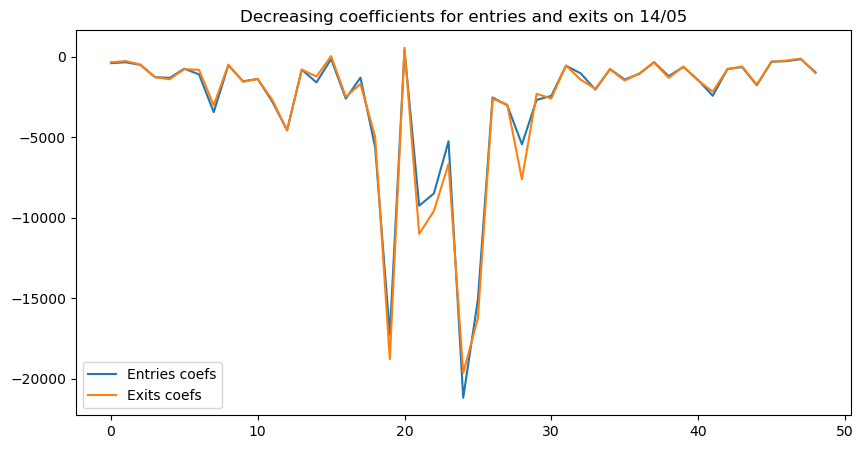

In [36]:
# Calculate the decreasing coefficients for each station 
# We ignore 2020 because of the pandemic
entries_coefs = []
exits_coefs = []
r2_entries = []
r2_exits = []
years = [2019, 2021, 2022, 2023]
years_ind = [i for i in range(len(years))]
date = '14/05'
for station in all_stations:
    entries = []
    exits = []
    for i, year in enumerate(years):
        ret = taps.get_entries_exits(station, date + '/' + str(years[i]))
        entries.append(ret["entries"])
        exits.append(ret["exits"])
    entries_coefs.append(np.polyfit(years_ind, entries, 1)[0])
    exits_coefs.append(np.polyfit(years_ind, exits, 1)[0])
    r2_entries.append(np.corrcoef(years_ind, entries)[0][1]**2)
    r2_exits.append(np.corrcoef(years_ind, exits)[0][1]**2)


plt.figure(figsize=(10, 5))
plt.plot(ind_stations, entries_coefs, label='Entries coefs')
plt.plot(ind_stations, exits_coefs, label='Exits coefs')
plt.title(f'Decreasing coefficients for entries and exits on {date}')
plt.legend()
plt.show()

We see that its not the case -> the distribution changes over time

[0.7131608248340982, 0.8053791620151517, 0.5963769438602775, 0.794962421651211, 0.8530286984510046, 0.7746682266779945, 0.6934255153983577, 0.46571122786465735, 0.7340292417622456, 0.7064136414642855, 0.7690455905797269, 0.6200633141325244, 0.5684122206548444, 0.5071015650484143, 0.14943613355602844, 0.0027607419783048617, 0.47120603338065126, 0.09891698617786407, 0.27943808789706104, 0.5928069468448757, 0.0009058190402216066, 0.4994809473440802, 0.7229821027647434, 0.5835164027733536, 0.6223458580894771, 0.37053366809460553, 0.43916156691302355, 0.5181887237234062, 0.12262472685326739, 0.6721301451494027, 0.6772707869260813, 0.6059118573640611, 0.5424696685631092, 0.7664599672715938, 0.8383167959304881, 0.8127974038316711, 0.9038034195484485, 0.7450431791184097, 0.8042505760392361, 0.5673366213383475, 0.5466929092163734, 0.8789341160663079, 0.8878492691586503, 0.8522697683120071, 0.9357248969163142, 0.8582595591403355, 0.8861222285679999, 0.8543000085690367, 0.41320473680391867]


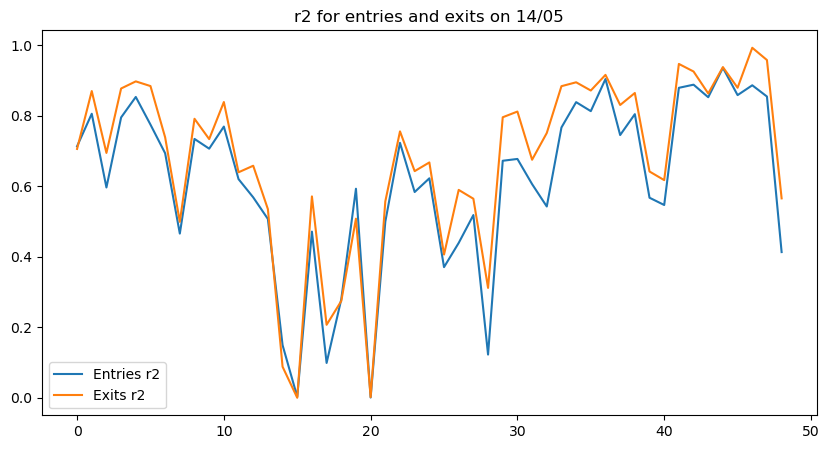

In [15]:
print(r2_entries)
plt.figure(figsize=(10, 5))
plt.plot(ind_stations, r2_entries, label='Entries r2')
plt.plot(ind_stations, r2_exits, label='Exits r2')
plt.title(f'r2 for entries and exits on {date}')
plt.legend()
